In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Cargar el conjunto de datos 
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_data = pd.read_csv(url)

# Mostrar las primeras filas 
print(sales_data.head())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


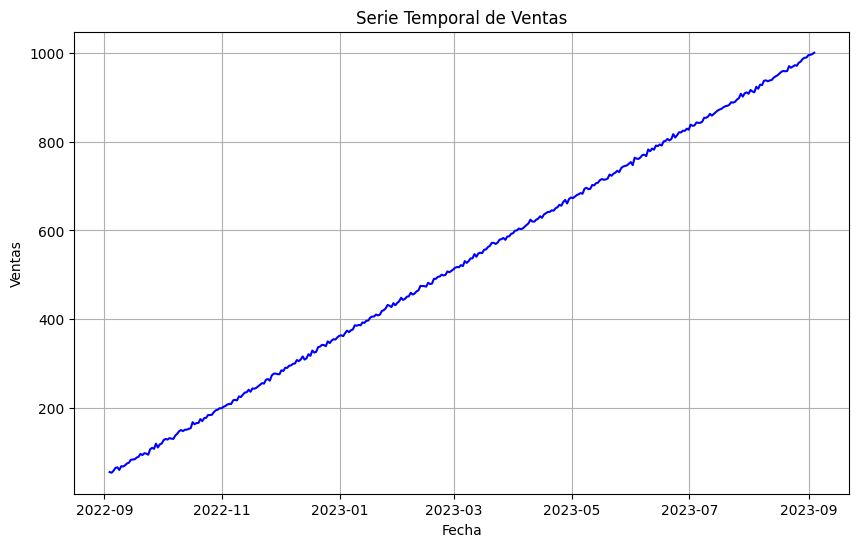

In [4]:
# Convertir la columna 'date' en formato datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Establecer la columna 'date' como el índice
sales_data.set_index('date', inplace=True)

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['sales'], color='blue')
plt.title('Serie Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

1 ¿Cuál es el tensor de la serie temporal?
Los datos parecen estar registrados a nivel mensual.

2 ¿Cuál es la tendencia?
La tendencia parece ser una tendencia lineal creciente, las ventas aumentan con el tiempo.

3 ¿Es estacionaria?
No parece estacionaria, ya que muestra una tendencia lineal creciente.

4 ¿Existe variabilidad o presencia de ruido?
Hay cierta variabilidad en los datos.

Estrategia implementada para el modelo SARIMA:

División de datos: Se dividen los datos de ventas en un conjunto de entrenamiento y un conjunto de prueba para poder entrenar el modelo y evaluar su desempeño.

Búsqueda de parámetros óptimos: Se realiza una búsqueda en cuadrícula sobre diferentes combinaciones de parámetros (p, d, q) y (P, D, Q, s) para encontrar la mejor configuración del modelo SARIMA. Esto se hace mediante la minimización del error cuadrático medio (MSE) en el conjunto de prueba.

Entrenamiento del modelo: Se entrena el modelo SARIMA con los mejores parámetros encontrados utilizando el conjunto de entrenamiento.

Predicción y evaluación: Se realizan predicciones sobre el conjunto de prueba utilizando el modelo entrenado y se calcula el error cuadrático medio (MSE) para evaluar el rendimiento del modelo.

Visualización de resultados: Se visualizan las predicciones del modelo junto con los datos reales en un gráfico para facilitar la interpretación de los resultados.

In [10]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignorar los mensajes de advertencia
warnings.filterwarnings("ignore")

# Definir los rangos de parámetros para el modelo SARIMA
p_values = range(0, 3)  # Autoregressive (AR) order
d_values = range(0, 2)  # Differencing (Integrated) order
q_values = range(0, 3)  # Moving Average (MA) order
P_values = range(0, 2)  # Seasonal Autoregressive (SAR) order
D_values = range(0, 2)  # Seasonal Differencing (Seasonal Integrated) order
Q_values = range(0, 2)  # Seasonal Moving Average (SMA) order

best_score, best_cfg = float("inf"), None

# Grid search para encontrar la mejor parametrización
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q)
                        seasonal_order = (P, D, Q, 12)  # Asumiendo una estacionalidad de 12 meses
                        try:
                            # Ajustar el modelo SARIMA
                            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
                            model_fit = model.fit(disp=False)
                            # Calcular el error cuadrático medio en el conjunto de prueba
                            predictions = model_fit.forecast(steps=len(test_data))
                            mse = mean_squared_error(test_data, predictions)
                            if mse < best_score:
                                best_score, best_cfg = mse, (order, seasonal_order)
                        except:
                            continue

print('Best SARIMA%s MSE=%.3f' % (best_cfg, best_score))

Best SARIMA((0, 1, 2), (1, 0, 1, 12)) MSE=8.291


SARIMA((0, 1, 2), (1, 0, 1, 12)) MSE=8.291


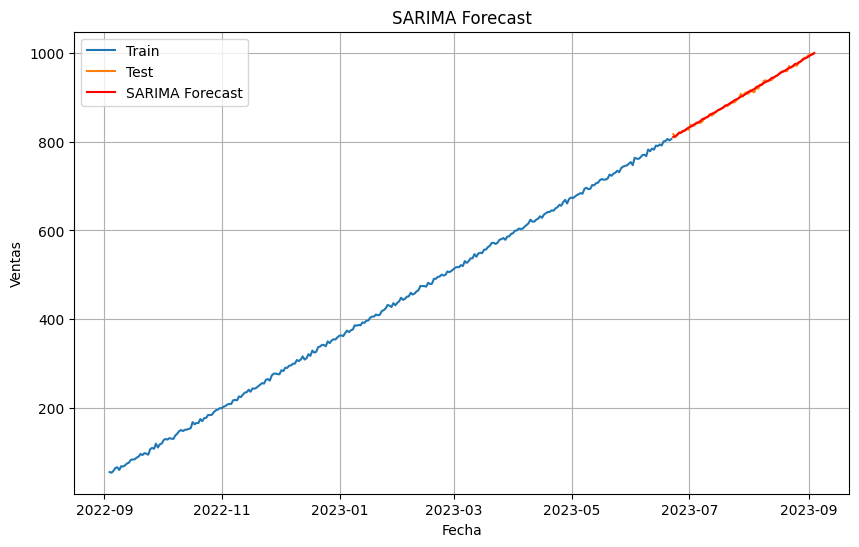

In [11]:
# Entrenar el modelo SARIMA con los mejores parámetros
order, seasonal_order = best_cfg
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Predecir sobre el conjunto de prueba
predictions = model_fit.forecast(steps=len(test_data))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_data, predictions)
print('SARIMA%s MSE=%.3f' % (best_cfg, mse))

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Predecir con el modelo entrenado
predictions = model_fit.forecast(steps=len(test_data))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error (MSE):', mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, predictions)
print('Mean Absolute Error (MAE):', mae)

# Calcular el error absoluto porcentual medio (MAPE)
mape = mean_absolute_percentage_error(test_data, predictions)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 8.290766824508477
Mean Absolute Error (MAE): 2.2541171276266954
Mean Absolute Percentage Error (MAPE): 0.00250867277265985


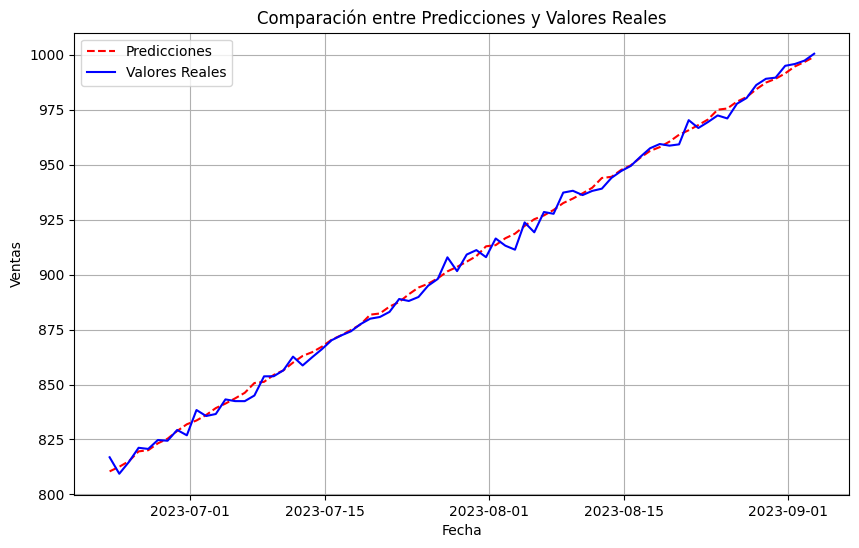

In [15]:
# Graficar las predicciones y los valores reales utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, predictions, label='Predicciones', color='red', linestyle='--')
plt.plot(test_data.index, test_data.values, label='Valores Reales', color='blue')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from joblib import dump
import os

# Especifica la ruta y el nombre de archivo donde deseas guardar el modelo
modelo_ruta = os.path.join('C:\\Users\\lenovo\\Desktop\\Proyectos Machine Learning\\Bootcamp\\Proyecto de Serie Temporal Alternativa\\models', 'modelo_sarima.joblib')

# Guarda el modelo entrenado en el archivo especificado
dump(model_fit, modelo_ruta)

print("El modelo se ha guardado correctamente en", modelo_ruta)

El modelo se ha guardado correctamente en C:\Users\lenovo\Desktop\Proyectos Machine Learning\Bootcamp\Proyecto de Serie Temporal Alternativa\models\modelo_sarima.joblib
